## DATA EXPLORATION ANALYSIS

### 1) Data overview 

### 2) KPI metrics 
    - DAU (daily active user)
    - MAU (month active user)
    - ARPU 
    - ARPPU
    - Retention 
    - Transaction rate 

### 3) Insights 
    - Trend
    - Issue of data 


In [2]:
import pandas as pd 
from sqlalchemy import create_engine
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [8]:
# UDF 
def get_db_data(sql):
    try:
        engine = create_engine('sqlite:///data/war_data.db', echo=False)
        print (sql)
        df = pd.read_sql(sql, engine)
        return df
    except Exception as e:
        print ('query data failed', str(e))
    
def get_date(timestamp):
    return timestamp[:10]

In [4]:
cd ../..

/Users/jerryliu/analysis


In [5]:
# get data 
engine = create_engine('sqlite:///data/war_data.db', echo=False)
sql_session = "select * from session;"
df_session = pd.read_sql(sql_session, engine)
sql_battle = "select * from battle;"
df_battle = pd.read_sql(sql_battle, engine)
sql_cost = "select * from cost;"
df_cost = pd.read_sql(sql_cost, engine)

## 1) DATA overview

## 2) KPI metric

### 2-1) DAU : user that login/access/view/pay/play game on the APP per day 

In [18]:
# DAU : user that login/access/view/pay/play game on the APP per day 

sql_dau = """
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1 order by 1;"""
df_dau = get_db_data(sql_dau)


select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1 order by 1;


In [14]:
df_dau.T

,0,1,2,3,4,5,6,7,8,9,...,338,339,340,341,342,343,344,345,346,347
date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14
count(distinct user_id),5,7,9,15,19,20,21,26,20,18,...,18,23,23,23,19,13,9,4,1,1


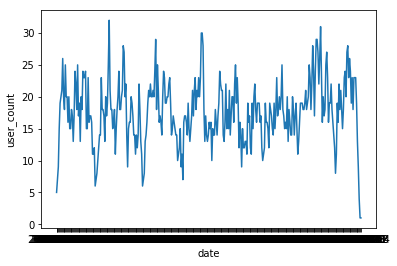

In [20]:
sns.lineplot(x="date", 
             y="user_count",
             data=df_dau)
plt.show()

### 2-2) ARPU  : Average revenue per user 

In [25]:
# ARPU : Average revenue per user

sql_arpu = """

with dau as (
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1),
revenue as ( 
select substr(event_timestamp,1, 10) AS date,
sum(usd_cost) as day_revenue
from cost
group by 1)
select 
dau.date,
revenue.day_revenue/dau.user_count as arpu
from dau
left join revenue on revenue.date = dau.date;

"""
df_arpu = get_db_data(sql_arpu)



with dau as (
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1),
revenue as ( 
select substr(event_timestamp,1, 10) AS date,
sum(usd_cost) as day_revenue
from cost
group by 1)
select 
dau.date,
revenue.day_revenue/dau.user_count as arpu
from dau
left join revenue on revenue.date = dau.date;




In [27]:
df_arpu.T

,0,1,2,3,4,5,6,7,8,9,...,338,339,340,341,342,343,344,345,346,347
date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14
arpu,NaN,NaN,1.11,4.13333,NaN,NaN,0.190476,0.346154,NaN,0.776667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
